# Arbol de Decisión

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [ ]:
datos = pd.read_csv("/Users/andresfelipemurilloavendano/Documents/2. CASO_Semestre_Analitica 2021-I/DataSetMuestraProyectoKL_v7may2021.txt", 
                 sep = "|", encoding = "latin-1", decimal = ',', error_bad_lines = False, dtype={'a': np.float32})

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730042 entries, 0 to 1730041
Data columns (total 81 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EPS                          int64  
 1   cmdcuentamedica              int64  
 2   prsIDPrestacion              int64  
 3   dprIDDetallePrestacion       int64  
 4   cmdPrefijoFactura            object 
 5   cmdNumeroFactura             int64  
 6   PrNumFactu1                  object 
 7   PrNumFactu2                  object 
 8   cmdFchEmisionFactura         object 
 9   cmdfchradicacion             object 
 10  cmdTotalFactura              float64
 11  FAC_FECH                     object 
 12  FAC_ESTA                     object 
 13  FAC_VATO                     float64
 14  FecPagoReciente              object 
 15  ValTotalPago                 float64
 16  cmdTotalIva                  int64  
 17  cmdTotalReteFuente           int64  
 18  cmdTotalReteIca              int64  
 19  

In [ ]:
datos = datos.drop(["cmdPrefijoFactura", "PrNumFactu1", "PrNumFactu2", "FAC_ESTA", "NombreEstadoCuenta",
                     "cafRadOtroOperador", "NombreAmbito", "NombreCobertura", "GeneroID",
                     "DescripcionEstado", "DescripcionRazon", "EstadoBDUA", "Cohorte", "TipoAfiliado",
                     "NombreGrupoEtareo", "NombreTipoProducto", "DescripcionServicio", "Tipo_Cod",
                     "Codigo", "Descripcion_Cups_Cum", "Seccion", "Servicio", "Agrupador2NTP", "Especialidad",
                     "tatDescAtencion", "NombreTipoCuenta", "dxIDHomolDiag", "dxDescripcion", 
                     "cmdFchEmisionFactura", "cmdfchradicacion", "FAC_FECH", "FecPagoReciente", "prsFchEntrada",
                     "prsFchSalida", "prsFchSalida", "prsFechaVistoBueno", "FechaNacimiento", "FechaRadicacion",
                     "FechaAfiliacion", "FechaRetiro"], axis=1)
datos.head()

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdNumeroFactura,cmdTotalFactura,FAC_VATO,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,...,prsTipoAtencion,idTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,1833,2022881.0,2022881.0,1705361.0,0,0,...,44.0,2,False,702,17001,False,False,False,False,False
1,1,15612717,37049102,122636975,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,False,762,5154,False,False,False,False,True
2,1,15612717,37049102,122636973,904882,76465.0,76465.0,76465.0,0,0,...,2.0,2,False,762,5154,False,False,False,False,False
3,1,14219175,34622073,111847983,3425458,49933.0,49933.0,49933.0,0,0,...,2.0,2,False,677,76736,False,False,False,False,False
4,1,16372641,38155400,127513164,4412959,4073108.0,NaN,NaN,0,0,...,44.0,2,False,359,15753,False,False,False,False,False


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730042 entries, 0 to 1730041
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EPS                          int64  
 1   cmdcuentamedica              int64  
 2   prsIDPrestacion              int64  
 3   dprIDDetallePrestacion       int64  
 4   cmdNumeroFactura             int64  
 5   cmdTotalFactura              float64
 6   FAC_VATO                     float64
 7   ValTotalPago                 float64
 8   cmdTotalIva                  int64  
 9   cmdTotalReteFuente           int64  
 10  cmdTotalReteIca              int64  
 11  cmdTotalICO                  int64  
 12  idEstadoCuenta               int64  
 13  idAmbito                     int64  
 14  idCobertura                  int64  
 15  dprvlrproducto               float64
 16  dprcantproducto              float64
 17  ValorTotalDetalle            float64
 18  dprVlrCopago                 float64
 19  

In [ ]:
datos = datos.fillna(0)

# Es necesario convertir las columnas object a numerico ya que son valores numericos que representan valores monetarios.

datos['ValorTotalDetalle']=datos['ValorTotalDetalle'].replace(",", ".",regex=True).astype('float').astype('int')

datos['dprcantproducto']=datos['dprcantproducto'].replace(",", ".",regex=True).astype('float').astype('int')

datos['cmdTotalFactura']=datos['cmdTotalFactura'].replace(",", ".",regex=True).astype('float').astype('int')

datos['ValTotalPago']=datos['ValTotalPago'].replace(",", ".",regex=True).astype('float').astype('int')

datos['dprvlrproducto']=datos['dprvlrproducto'].replace(",", ".",regex=True).astype('float').astype('int')

datos['esContratoEspecial'] = datos['esContratoEspecial'].astype(int)

datos['ValUnitAt'] = datos['ValUnitAt'].astype(int)

datos['sss1'] = datos['sss1'].astype(int)
datos['sss2'] = datos['sss2'].astype(int)
datos['ssd1'] = datos['ssd1'].astype(int)
datos['ssd2'] = datos['ssd2'].astype(int)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730042 entries, 0 to 1730041
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EPS                          int64  
 1   cmdcuentamedica              int64  
 2   prsIDPrestacion              int64  
 3   dprIDDetallePrestacion       int64  
 4   cmdNumeroFactura             int64  
 5   cmdTotalFactura              int64  
 6   FAC_VATO                     float64
 7   ValTotalPago                 int64  
 8   cmdTotalIva                  int64  
 9   cmdTotalReteFuente           int64  
 10  cmdTotalReteIca              int64  
 11  cmdTotalICO                  int64  
 12  idEstadoCuenta               int64  
 13  idAmbito                     int64  
 14  idCobertura                  int64  
 15  dprvlrproducto               int64  
 16  dprcantproducto              int64  
 17  ValorTotalDetalle            int64  
 18  dprVlrCopago                 float64
 19  

In [ ]:
datos["ValUnitAt"].value_counts()

0    1417076
1     312966
Name: ValUnitAt, dtype: int64

### 312.966 datos atipicos y sospechosos de fraude, encontrados mediante los rangos intercuartilicos y test SSS1, SSS2, SSD1, SSD2, seran marcados con True = 1
### Los demás datos con False = 0

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = 'ValUnitAt'),
                                        datos['ValUnitAt'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough')

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 18


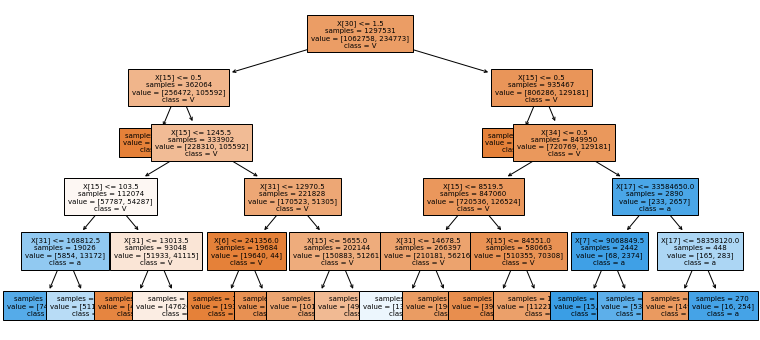

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            class_names   = 'ValUnitAt',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [ ]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test_prep,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

array([[347767,   6551],
       [ 68054,  10139]])

Matriz de confusión
-------------------


Text(91.68, 0.5, 'predicted label')

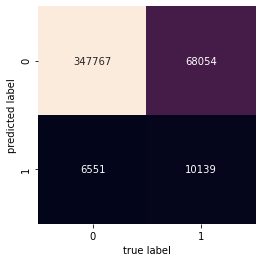

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, predicciones)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 82.75072772715608 %


In [ ]:
##accuracy, precisión, recall
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90    354318
           1       0.61      0.13      0.21     78193

    accuracy                           0.83    432511
   macro avg       0.72      0.56      0.56    432511
weighted avg       0.79      0.83      0.78    432511



## Podado del árbol (pruning)


se utilizó un valor de max_depth=5, pero no sabemos si es el mejor valor. Para poder identificar la profundidad óptima que reduce la varianza y aumenta la capacidad predictiva del modelo, debemos podar el árbol mediante el proceso de pruning.

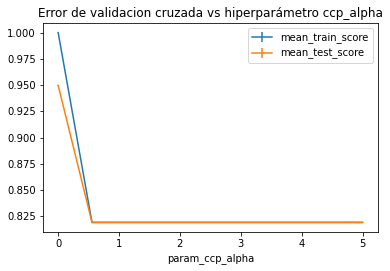

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, volvemos a entrenar el árbol indicando el valor de los argumentos. Si el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 48
Número de nodos terminales: 46378


In [ ]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 95.20497744566035 %


La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [ ]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': datos[datos.columns[0:41]].columns.tolist(),
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

# datos.columns.tolist()

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
31,CodigoServicio,0.432815
15,dprvlrproducto,0.227971
35,idNit,0.049404
4,cmdNumeroFactura,0.040533
36,CodigoDANEDeptoMunPrestador,0.039792
30,idTipoProducto,0.037587
17,ValorTotalDetalle,0.034053
5,cmdTotalFactura,0.017694
1,cmdcuentamedica,0.017448
24,DANEAfiliado,0.011380
